In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures



In [10]:
# 加载训练和测试数据
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

X_train = train_data['x'].values.reshape(-1, 1)
y_train = train_data['y_complex'].values
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # 添加截距项


X_test = test_data['x_new'].values.reshape(-1, 1)
y_test = test_data['y_new_complex'].values
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # 添加截距项

## 最小二乘法

In [11]:

# 移除包含NaN值的行
X_train_b = X_train_b[~np.isnan(X_train_b).any(axis=1)]
y_train = y_train[~np.isnan(y_train)]
X_test_b = X_test_b[~np.isnan(X_test_b).any(axis=1)]
y_test = y_test[~np.isnan(y_test)]

theta_ls = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

# 计算预测值
train_pred_ls = X_train_b @ theta_ls
test_pred_ls = X_test_b @ theta_ls

# 计算误差
ls_train_mse = mean_squared_error(y_train, train_pred_ls)
ls_test_mse = mean_squared_error(y_test, test_pred_ls)

print(f"最小二乘法 - 训练误差: {ls_train_mse:.6f}, 测试误差: {ls_test_mse:.6f}")

最小二乘法 - 训练误差: 0.613402, 测试误差: 0.595043


## 梯度下降法

In [12]:
# 梯度下降法参数
lr = 0.01
n_iters = 10000
theta_gd = np.random.randn(2, 1)
loss_history = []

# 梯度下降迭代
for iteration in range(n_iters):
    # 计算梯度
    gradients = 2/len(X_train_b) * X_train_b.T @ (X_train_b @ theta_gd - y_train.reshape(-1, 1))
    
    # 更新参数
    theta_gd -= lr * gradients
    
    # 记录损失
    if iteration % 500 == 0:
        current_loss = np.mean((X_train_b @ theta_gd - y_train.reshape(-1, 1))**2)
        loss_history.append(current_loss)

# 计算预测值
train_pred_gd = X_train_b @ theta_gd
test_pred_gd = X_test_b @ theta_gd

# 计算误差
gd_train_mse = mean_squared_error(y_train, train_pred_gd)
gd_test_mse = mean_squared_error(y_test, test_pred_gd)

print(f"梯度下降法 - 训练误差: {gd_train_mse:.6f}, 测试误差: {gd_test_mse:.6f}")

梯度下降法 - 训练误差: 0.613402, 测试误差: 0.595043


## 牛顿法

In [13]:
# 初始化参数
theta_nt = np.random.randn(2, 1)

# 计算Hessian矩阵
H = 2 * X_train_b.T @ X_train_b / len(X_train_b)

# 计算梯度
grad = 2 * X_train_b.T @ (X_train_b @ theta_nt - y_train.reshape(-1, 1)) / len(X_train_b)

# 牛顿法更新（对于线性回归是二次函数，一次迭代即可收敛）
theta_nt = theta_nt - np.linalg.inv(H) @ grad

# 计算预测值
train_pred_nt = X_train_b @ theta_nt
test_pred_nt = X_test_b @ theta_nt

# 计算误差
nt_train_mse = mean_squared_error(y_train, train_pred_nt)
nt_test_mse = mean_squared_error(y_test, test_pred_nt)

print(f"牛顿法 - 训练误差: {nt_train_mse:.6f}, 测试误差: {nt_test_mse:.6f}")

牛顿法 - 训练误差: 0.613402, 测试误差: 0.595043



Error Comparison of Three Methods:
             Method  Train Error  Test Error
0     Least Squares     0.613402    0.595043
1  Gradient Descent     0.613402    0.595043
2     Newton Method     0.613402    0.595043


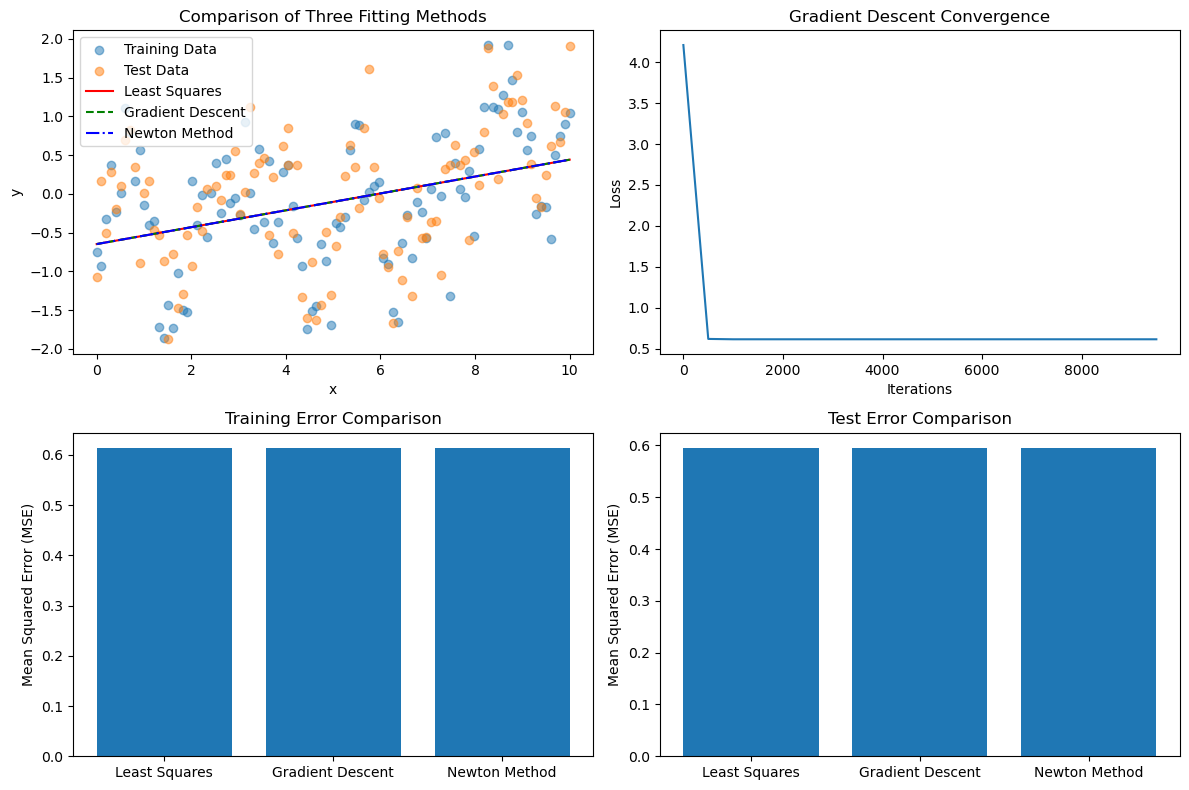

In [14]:
# Results comparison
results = pd.DataFrame({
    'Method': ['Least Squares', 'Gradient Descent', 'Newton Method'],
    'Train Error': [ls_train_mse, gd_train_mse.item(), nt_train_mse.item()],
    'Test Error': [ls_test_mse, gd_test_mse.item(), nt_test_mse.item()]
})

print("\nError Comparison of Three Methods:")
print(results)

# Visualization of fitting results
plt.figure(figsize=(12, 8))

# Data visualization
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, alpha=0.5, label='Training Data')
plt.scatter(X_test, y_test, alpha=0.5, label='Test Data')
x_range = np.linspace(min(X_train.min(), X_test.min()), max(X_train.max(), X_test.max()), 100).reshape(-1, 1)
x_range_b = np.c_[np.ones((x_range.shape[0], 1)), x_range]
plt.plot(x_range, x_range_b @ theta_ls, 'r-', label='Least Squares')
plt.plot(x_range, x_range_b @ theta_gd, 'g--', label='Gradient Descent')
plt.plot(x_range, x_range_b @ theta_nt, 'b-.', label='Newton Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of Three Fitting Methods')

# Gradient descent convergence process
plt.subplot(2, 2, 2)
plt.plot(range(0, n_iters, 500), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Gradient Descent Convergence')

# Training error comparison
plt.subplot(2, 2, 3)
methods = ['Least Squares', 'Gradient Descent', 'Newton Method']
train_errors = [ls_train_mse, gd_train_mse.item(), nt_train_mse.item()]
plt.bar(methods, train_errors)
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Error Comparison')

# Test error comparison
plt.subplot(2, 2, 4)
test_errors = [ls_test_mse, gd_test_mse.item(), nt_test_mse.item()]
plt.bar(methods, test_errors)
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Test Error Comparison')

plt.tight_layout()
plt.show()


## 多项式拟合

Polynomial Degree 7 - Training MSE: 0.465070, Test MSE: 0.463095
Polynomial Degree 8 - Training MSE: 0.461389, Test MSE: 0.461953
Polynomial Degree 9 - Training MSE: 0.354109, Test MSE: 0.387459
Polynomial Degree 10 - Training MSE: 0.349728, Test MSE: 0.383665
Polynomial Degree 11 - Training MSE: 0.301304, Test MSE: 0.339178
Polynomial Degree 12 - Training MSE: 0.296801, Test MSE: 0.342474
Polynomial Degree 13 - Training MSE: 0.292076, Test MSE: 0.358760
Polynomial Degree 14 - Training MSE: 0.301186, Test MSE: 0.349097
Polynomial Degree 15 - Training MSE: 0.294089, Test MSE: 0.366148
Polynomial Degree 16 - Training MSE: 0.359638, Test MSE: 0.382653
Polynomial Degree 17 - Training MSE: 0.478845, Test MSE: 0.475452


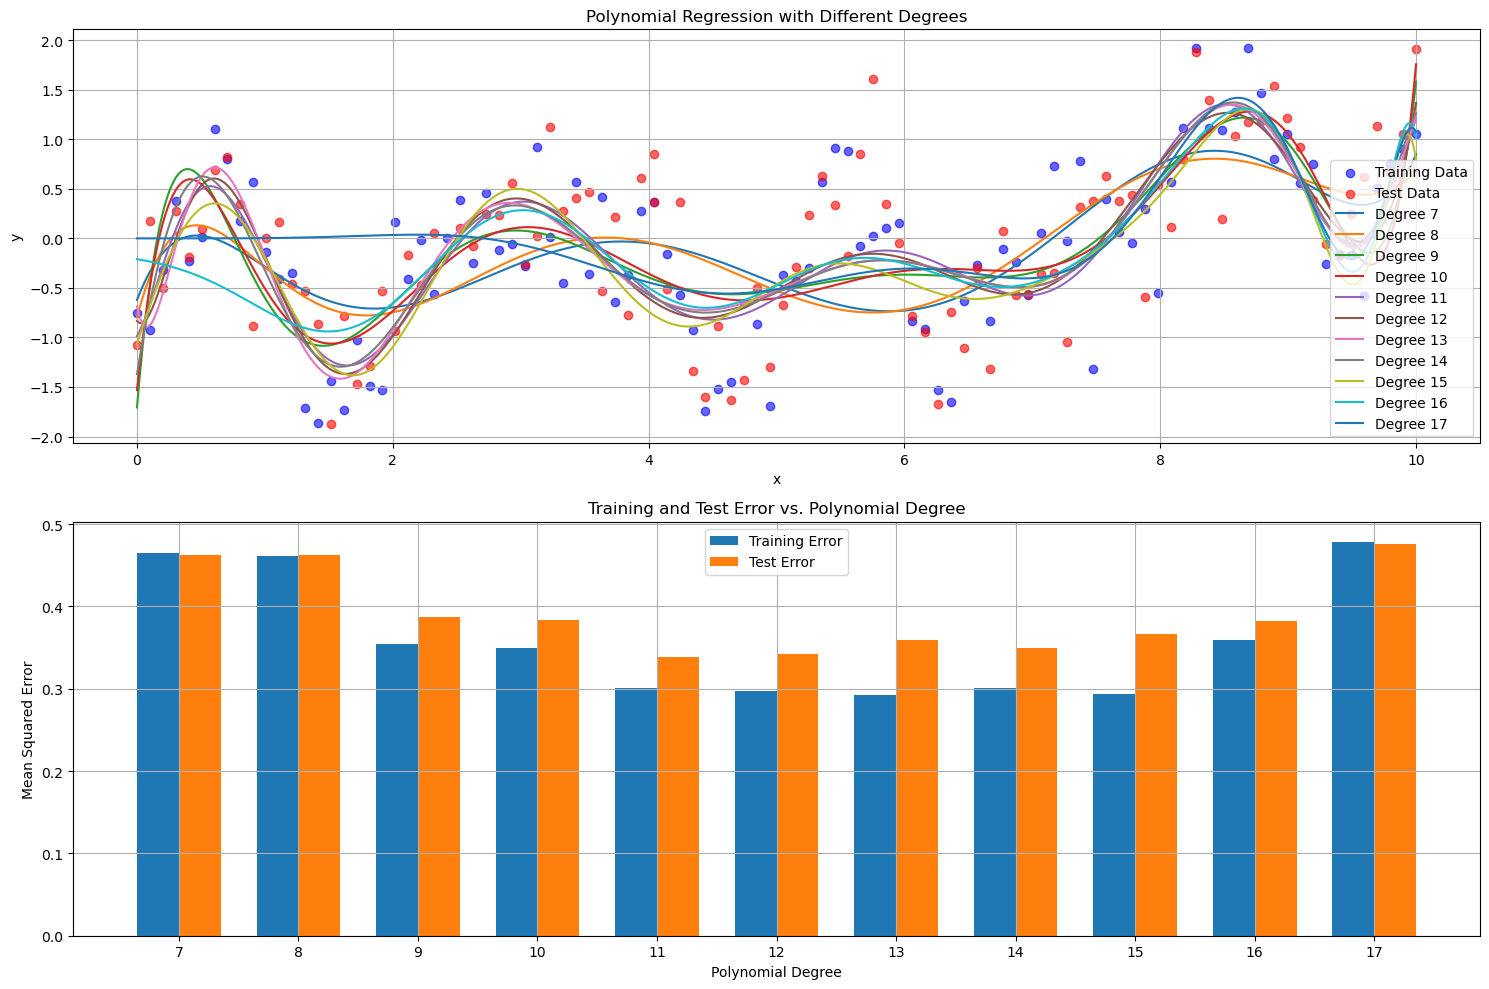


Best polynomial degree: 11 with test MSE: 0.339178


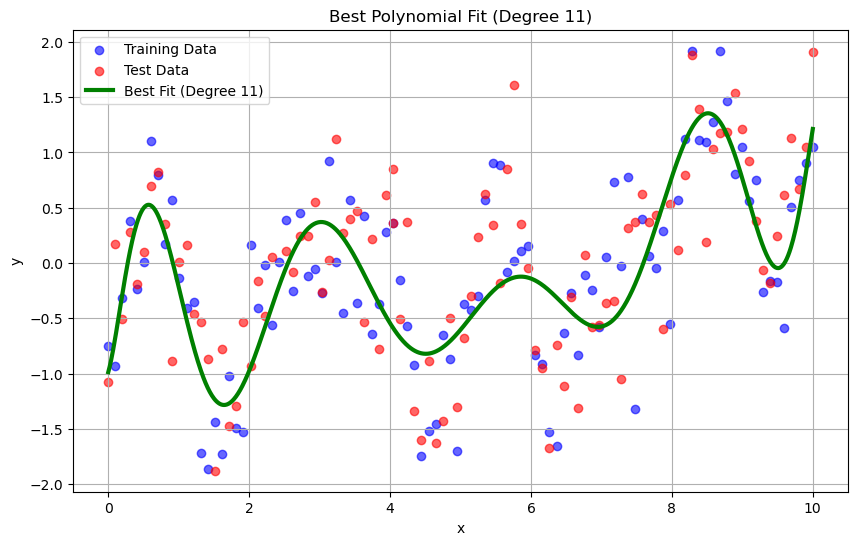


Best model coefficients:
  x^0: -0.986440
  x^1: 2.235532
  x^2: 12.201696
  x^3: -34.878885
  x^4: 34.379800
  x^5: -17.619893
  x^6: 5.358676
  x^7: -1.020659
  x^8: 0.123113
  x^9: -0.009140
  x^10: 0.000381
  x^11: -0.000007


In [16]:
# 多项式回归拟合
degrees = [7,8,9,10,11,12,13,14,15,16,17]  # 尝试不同的多项式阶数
train_errors = []
test_errors = []
models = []

plt.figure(figsize=(15, 10))

# 准备数据可视化
plt.subplot(2, 1, 1)
plt.scatter(X_train, y_train, alpha=0.6, color='blue', label='Training Data')
plt.scatter(X_test, y_test, alpha=0.6, color='red', label='Test Data')

# 创建平滑曲线的x值范围
x_range = np.linspace(min(X_train.min(), X_test.min()), 
                      max(X_train.max(), X_test.max()), 
                      1000).reshape(-1, 1)

# 对不同阶数的多项式进行拟合
for degree in degrees:
    # 创建多项式特征
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    x_range_poly = poly_features.transform(x_range)
    
    # 拟合模型
    model = LinearRegression(fit_intercept=False)  # 因为PolynomialFeatures已包含截距项
    model.fit(X_train_poly, y_train)
    models.append(model)
    
    # 进行预测
    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)
    
    # 计算误差
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    train_errors.append(train_mse)
    test_errors.append(test_mse)
    
    # 绘制拟合曲线
    y_plot = model.predict(x_range_poly)
    plt.plot(x_range, y_plot, label=f'Degree {degree}')
    
    print(f"Polynomial Degree {degree} - Training MSE: {train_mse:.6f}, Test MSE: {test_mse:.6f}")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression with Different Degrees')
plt.legend()
plt.grid(True)

# 绘制误差比较图
plt.subplot(2, 1, 2)
width = 0.35
x = np.arange(len(degrees))
plt.bar(x - width/2, train_errors, width, label='Training Error')
plt.bar(x + width/2, test_errors, width, label='Test Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Error vs. Polynomial Degree')
plt.xticks(x, degrees)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 找出测试误差最小的最佳模型
best_degree_idx = np.argmin(test_errors)
best_degree = degrees[best_degree_idx]
best_model = models[best_degree_idx]
print(f"\nBest polynomial degree: {best_degree} with test MSE: {test_errors[best_degree_idx]:.6f}")

# 绘制最佳模型的详细拟合图
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.6, color='blue', label='Training Data')
plt.scatter(X_test, y_test, alpha=0.6, color='red', label='Test Data')

# 使用最佳模型创建预测
best_poly_features = PolynomialFeatures(degree=best_degree, include_bias=True)
x_range_poly = best_poly_features.fit_transform(x_range)
y_plot = best_model.predict(x_range_poly)

plt.plot(x_range, y_plot, color='green', linewidth=3, label=f'Best Fit (Degree {best_degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Best Polynomial Fit (Degree {best_degree})')
plt.legend()
plt.grid(True)
plt.show()

# 显示最佳模型的系数
coefficients = best_model.coef_
print("\nBest model coefficients:")
for i, coef in enumerate(coefficients):
    print(f"  x^{i}: {coef:.6f}")

#### 支持向量机回归SVR


SVR (RBF) - Training MSE: 0.191155, Test MSE: 0.268754
Random Forest - Training MSE: 0.045767, Test MSE: 0.276250


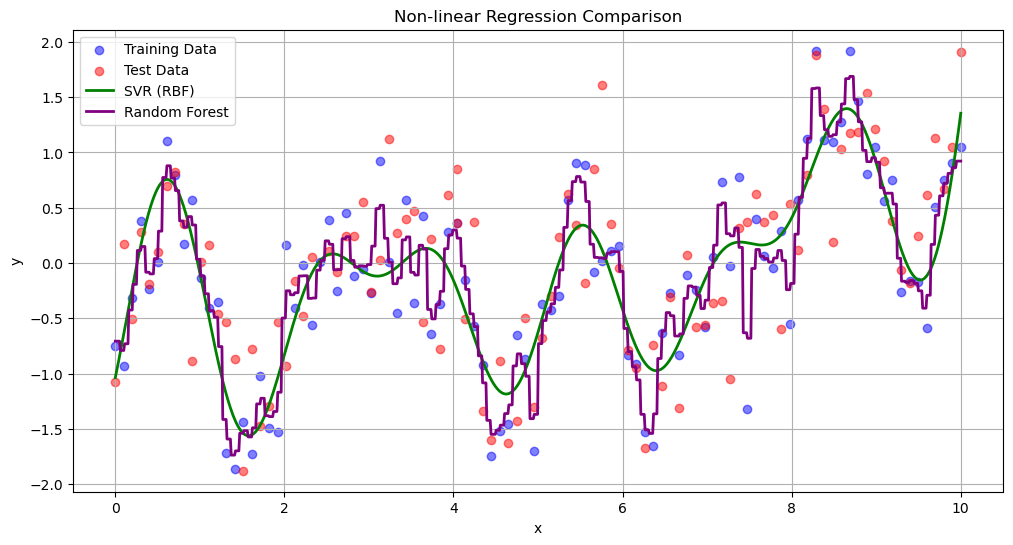

In [28]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# 数据准备
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# 创建x值范围，用于绘制拟合曲线
x_range = np.linspace(min(X_train.min(), X_test.min()), 
                      max(X_train.max(), X_test.max()), 
                      1000).reshape(-1, 1)

# 1. 支持向量回归 (SVR)
svr_rbf = SVR(kernel='rbf', C=1000, gamma=0.4, epsilon=.1)
svr_rbf.fit(X_train, y_train)
svr_train_pred = svr_rbf.predict(X_train)
svr_test_pred = svr_rbf.predict(X_test)
svr_train_mse = mean_squared_error(y_train, svr_train_pred)
svr_test_mse = mean_squared_error(y_test, svr_test_pred)

# 2. 随机森林回归
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)

# 打印结果
print(f"SVR (RBF) - Training MSE: {svr_train_mse:.6f}, Test MSE: {svr_test_mse:.6f}")
print(f"Random Forest - Training MSE: {rf_train_mse:.6f}, Test MSE: {rf_test_mse:.6f}")

# 可视化
plt.figure(figsize=(12, 6))

# 原始数据散点图
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.5)
plt.scatter(X_test, y_test, color='red', label='Test Data', alpha=0.5)

# 绘制SVR拟合曲线
svr_y_plot = svr_rbf.predict(x_range)
plt.plot(x_range, svr_y_plot, color='green', linewidth=2, label='SVR (RBF)')

# 绘制随机森林拟合曲线
rf_y_plot = rf_model.predict(x_range)
plt.plot(x_range, rf_y_plot, color='purple', linewidth=2, label='Random Forest')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Non-linear Regression Comparison')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# 数据准备
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# 创建x值范围，用于绘制拟合曲线
x_range = np.linspace(min(X_train.min(), X_test.min()), 
                      max(X_train.max(), X_test.max()), 
                      1000).reshape(-1, 1)
